### Introduction to Point Cloud Estimation

#### First Step: Point Cloud Generation

Typically, point clouds would be generated using 3D cameras or scanners. For the sake of practice and exploration, I'm just going to generate a (nx3) array to represent 3D data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [4]:
number_points = 5
pcd = np.random.rand(number_points, 3) 
print(pcd)

[[0.44936414 0.53209234 0.45329513]
 [0.93712417 0.59061864 0.89929204]
 [0.766223   0.3003852  0.94230972]
 [0.10870449 0.3799594  0.11175521]
 [0.39009019 0.02468867 0.77888728]]


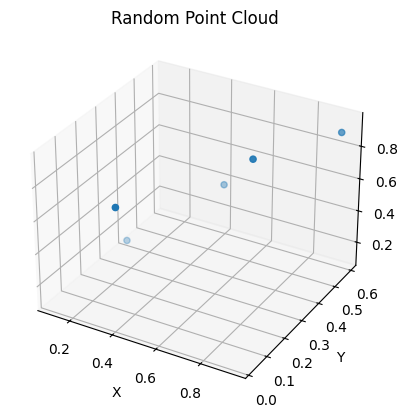

In [5]:
# Create Figure:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter3D(pcd[:, 0], pcd[:, 1], pcd[:, 2])
# label the axes
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Random Point Cloud")
# display:
plt.show()

##### pointcloud example with bunny mesh from open3D

In [5]:
bunny = o3d.data.BunnyMesh()
mesh = o3d.io.read_triangle_mesh(bunny.path)

##### The open3d library can visualize meshes with the code below

In [6]:
# Visualize:
mesh.compute_vertex_normals() # compute normals for vertices or faces
o3d.visualization.draw_geometries([mesh])

In [7]:
# Only Sample 1000 points:
pcd = mesh.sample_points_uniformly(number_of_points=1000)

# visualize:
o3d.visualization.draw_geometries([pcd])

##### Code to save a point cloud in .ply format

In [8]:
o3d.io.write_point_cloud("output/bunny_pcd.pcd", pcd)

[Open3D WARNING] Write PCD failed: unable to open file.


False

##### Processing point clouds from RGB-D data

In [9]:
# read the color and the depth image:
# Insert data from 3D cameras here
color_raw = o3d.io.read_image("../data/rgb.jpg")
depth_raw = o3d.io.read_image("../data/depth.png")

# create an rgbd image object:
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw, convert_rgb_to_intensity=False)
# use the rgbd image to create point cloud:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))

# visualize:
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] Read JPG failed: unable to open file: ../data/rgb.jpg
[Open3D WARNING] Read PNG failed: unable to parse header.


RuntimeError: [Open3D Error] (class std::shared_ptr<class open3d::geometry::PointCloud> __cdecl open3d::geometry::PointCloud::CreateFromRGBDImage(const class open3d::geometry::RGBDImage &,const class open3d::camera::PinholeCameraIntrinsic &,const class Eigen::Matrix<double,4,4,0,4,4> &,bool)) D:\a\Open3D\Open3D\cpp\open3d\geometry\PointCloudFactory.cpp:176: Unsupported image format.


##### Converting Numpy to pointcloud

In [10]:
# Create numpy pointcloud:
number_points = 2000
pcd_np = np.random.rand(number_points, 3)

# Convert to Open3D.PointCLoud:
pcd_o3d = o3d.geometry.PointCloud()  # create point cloud object
pcd_o3d.points = o3d.utility.Vector3dVector(pcd_np)  # set pcd_np as the point cloud points

# Visualize:
o3d.visualization.draw_geometries([pcd_o3d])

##### From open3D to Numpy

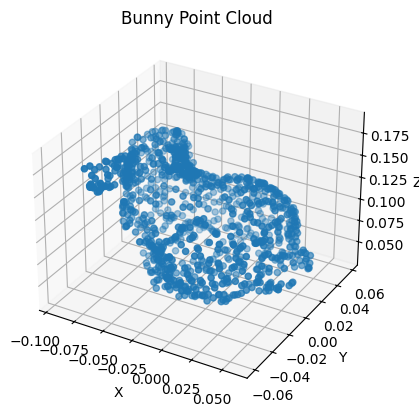

In [13]:
# Read the bunny point cloud file:
pcd_o3d = o3d.io.read_point_cloud("bunny_pcd.pcd")

# Convert the open3d object to numpy:
pcd_np = np.asarray(pcd_o3d.points)

# Display using matplotlib:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter3D(pcd_np[:, 0], pcd_np[:, 2], pcd_np[:, 1])
# label the axes
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Bunny Point Cloud")
# display:
plt.show()